<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW2/02_03_mnist_cnn_tf2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **실습 2-3 :  tf.keras 모듈을 이용한 Convolution Neural Network 설계하기**


- *이미지 분류(Image Classification)를 위한 뉴럴 네트워크를 CNN으로 설계한다*


## **Import Module**

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)
print (tf.keras.__version__)

2.0.0
2.2.4-tf


## **DataSet**

### Load

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print (x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


### Preview

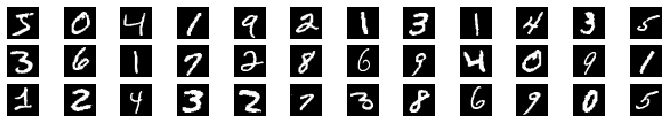

In [4]:
plt.figure(figsize=(12, 2))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")
plt.show()

In [5]:
# add a channel dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]      # channel을 추가하는 것! (이 데이터는 흑백이니가 channel=1)

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## **Model**

### Define

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_32 (Conv2D)             (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


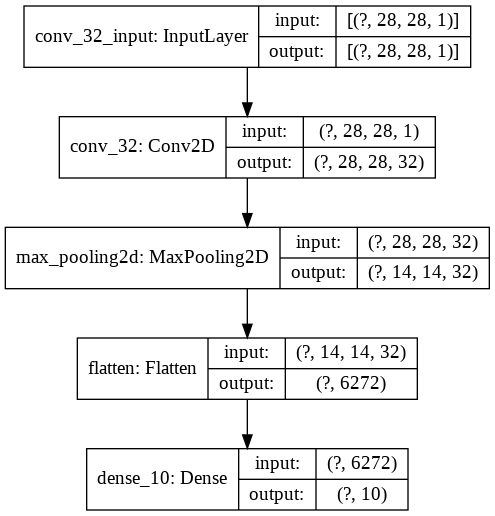

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', 
                         input_shape=(28,28,1), name='conv_32'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
  tf.keras.layers.Flatten(name='flatten'),
  tf.keras.layers.Dense(10, activation='softmax', name='dense_10')
])    # Conv2D에서는 input_shape로 4차원이 들어가야 함!!1  그래서 바로 위에서 차원을 1 올려준 것! 그런데 왜 3개? : 맨 앞은 Batch size이기 때문!!

model.summary()
tf.keras.utils.plot_model(model, 'my_cnn_model.png', show_shapes=True)

### Compile

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# sparse : one-hot encoding하지 않고 사용하셔도 좋습니다!! 라는 의미

### Fit

Epoch 20/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0365 - accuracy: 0.9901
CPU times: user 33.8 s, sys: 14.9 s, total: 48.6 s   
Wall time: 48 s (@Notebook Setting/GPU)

In [8]:
%%time
history = model.fit(x_train, y_train, 
                 batch_size=512, epochs=30,
                 validation_data=(x_test, y_test)
                 )

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 89us/sample - loss: 0.6383 - accuracy: 0.8419 - val_loss: 0.2789 - val_accuracy: 0.9200
Epoch 2/30
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2469 - accuracy: 0.9306 - val_loss: 0.2033 - val_accuracy: 0.9408
Epoch 3/30
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1784 - accuracy: 0.9495 - val_loss: 0.1458 - val_accuracy: 0.9593
Epoch 4/30
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1356 - accuracy: 0.9626 - val_loss: 0.1161 - val_accuracy: 0.9681
Epoch 5/30
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1093 - accuracy: 0.9700 - val_loss: 0.1032 - val_accuracy: 0.9702
Epoch 6/30
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0934 - accuracy: 0.9737 - val_loss: 0.0882 - val_accuracy: 0.9739
Epoch 7/30
60000/60000 [==============================] 

### Evaluate

In [9]:
model.evaluate(x_test,  y_test, verbose=0)

[0.05460812353026122, 0.9835]

## **Analysis**

### Plot

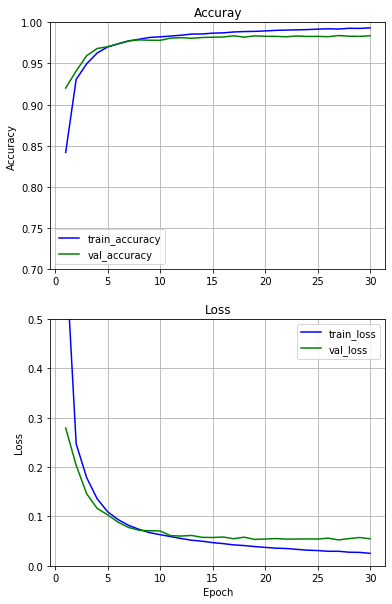

In [10]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(6, 10))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')

plt.grid(True)
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 0.5])
plt.legend(loc='best')
plt.show()

### Prediction

In [11]:
# 테스트셋 첫 이미지 예측정보
print (model.predict(x_test[:1, :]))

[[2.4655176e-12 4.4830372e-11 5.4072121e-08 5.6623612e-06 1.6941715e-12
  1.0839922e-09 5.7124543e-18 9.9999356e-01 1.9768263e-08 6.8066015e-07]]


In [12]:
# 데스트셋 첫 이미지 분류
print (model.predict_classes(x_test[:1, :], verbose=0))

[7]


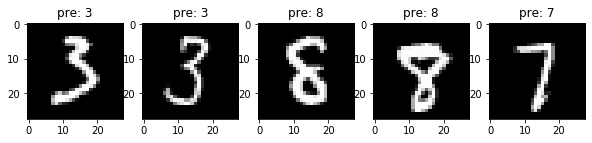

In [13]:
def model_eval(model, n=230):
  #n = 230
  plt.figure(figsize=(10, 2))
  for i in range(5):
    img_idx = n+i
    predict = model.predict(x_test[img_idx:img_idx+1, :])
    img = x_test[img_idx]
    plt.subplot(1,5,i+1)
    plt.imshow(img.reshape((28,28)), cmap='gray')
    plt.title('pre: {}'.format(np.argmax(predict)))

  plt.show()

model_eval(model)

## **실습과제**

### 과제1 Conv Layer를 Functional API로 바꿔보자  
#### -- conv layer를 한단 추가해 보자 
#### -- 성능을 비교 하라 : 

Model: "functional_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
handwritten (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv_32_2 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv_32_2_2 (Conv2D)         (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)          

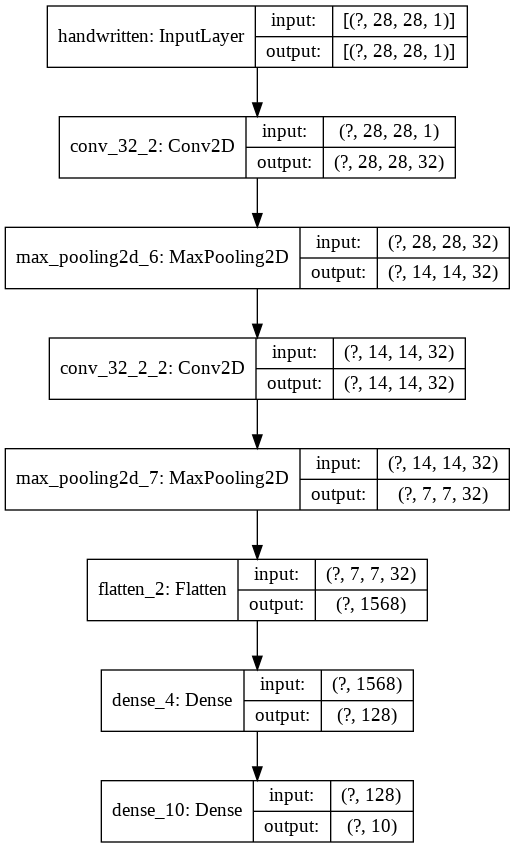

In [22]:
inputs = tf.keras.Input(shape=(28, 28, 1), name='handwritten')

x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', 
                         input_shape=(28,28,1), name='conv_32_2')(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', 
                         input_shape=(14,14,1), name='conv_32_2_2')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x =  tf.keras.layers.Flatten(name='flatten_2')(x)
x = tf.keras.layers.Dense(128, activation='sigmoid')(x)
outputs = tf.keras.layers.Dense(10, activation='softmax', name='dense_10')(x)
model_f = tf.keras.Model(inputs=inputs, outputs=outputs, name='functional_model')

model_f.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_f.summary()

tf.keras.utils.plot_model(model_f, 'my_cnn_model_2.png', show_shapes=True)





### 과제2 아래 코드를 참조하여 팀 폴더 밑에 있는 개인 폴더에 모델 파일을 저장해 보자 
#### -- 개인 폴더를 어떻게 관리할 것인지 생각해 보자 



#### **File**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
model_path = '/content/drive/Shared drives/scsa_2019_e/models/'

##### Save model

In [0]:
model.save(model_path+'my_cnn_model.hdf5')
# delete
del model

##### Load model

In [0]:
from tensorflow.keras.models import load_model

model2 = load_model(model_path+'my_cnn_model.hdf5')


In [0]:
test_idx = 100
print(model2.predict_classes(x_test[test_idx:test_idx+1, :], verbose=1))

In [0]:
model_eval(model2)

In [0]:
# chkeck a loaded mode
model2.summary()